# CS986FoMLDAGroup12 Regression Problem

In [ ]:
John Were 202151881 
Lisa Fulton 202184799 
Tahnia Sabah 202160537 
Amogh Patil 202186255 
Muhammad Umar Janjua 202169077 

In this assignment we are tasked with finding a machine learning model using regression that will be able to predict future instances based on the attributes associated with the training dataset. The dataset used here is a collection of songs and attributes based on a larger dataset collected from a Spotify playlist. Our goal in this assignment is to explore the dataset, gain insights into which attributes will be the most useful, and to build a regression model capable of prediction. This will be followed by our findings and potential future work that we feel would be useful in improving the predications for this regression problem. 

# 1. Set Up

In [1]:
##Import necessary libraries, making sure matplotlib plot figures inline and prepare the function to save the figures 
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Regression_problem_song_popularity_score"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 2. Getting Data

In [8]:
import pandas as pd
Song_popularity_train=pd.read_csv("CS98XRegressionTrain.csv")

In [9]:
Song_popularity_train

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


# 3. Data Exploration

## 3.1 Taking a quick look of the data structure

In [10]:
Song_popularity_train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [11]:
Song_popularity_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


There are 453 instances in the dataset. It is important to note that top genre attribute has only 438 non-null values, this means that 15 songs are missing this feature.

In [12]:
Song_popularity_train["title"].value_counts()

Please Mr. Postman                             2
Take Good Care Of My Baby - 1990 Remastered    2
Eye of the Tiger                               1
Can't Help Falling in Love                     1
A Thousand Miles Away                          1
                                              ..
Raindrops                                      1
Rock Your Baby                                 1
I Feel Love - Edit                             1
Telstar                                        1
No Matter What                                 1
Name: title, Length: 451, dtype: int64

It appears that there are only two songs that share the same title. We don't think that this should be a problem as 'title' is one of the columns we will likely be dropping.

In [13]:
Song_popularity_train["artist"].value_counts()

Elton John                     9
Queen                          7
ABBA                           7
The Beatles                    6
Mariah Carey                   5
                              ..
Shontelle                      1
Alice Coltrane                 1
Joan Jett & The Blackhearts    1
Player                         1
Jayne Mansfield                1
Name: artist, Length: 345, dtype: int64

Elton John is the artist with the most songs in this dataset.

In [14]:
Song_popularity_train["top genre"].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
brit funk              1
alternative rock       1
boogaloo               1
bow pop                1
louisiana blues        1
Name: top genre, Length: 86, dtype: int64

'Adult standards' has the highest number of songs belonging to that genre.

In [15]:
Song_popularity_train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


The count, mean, min, and max rows can be seen here clearly. The null values have been ignored, for example the count for top genre is 438 not 453. We need to have a look at the 25th percentile, or the first quartile, the median, and the 75th percentile, or third quartile. The 25%, 50%, and 75% rows show the corresponding percentiles which indicate the value below which a given percentage of observations in a group of observations fall. For instance, 25% of the songs have a median popularity score of lower than 53, while 50% have lower than 63, and 75% have lower than 71.

## 3.2 Plotting histograms for each column

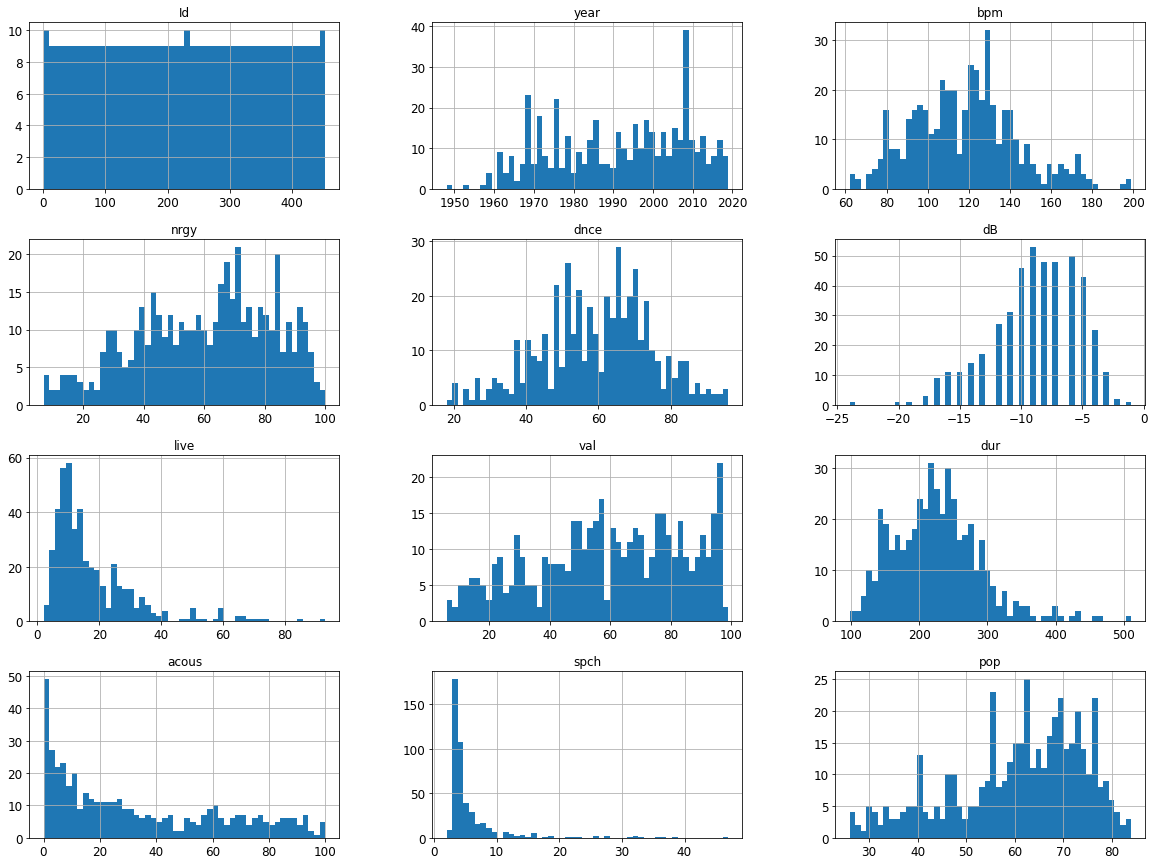

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
Song_popularity_train.hist(bins=50,figsize=(20,15))
plt.show()

After performing the exploratory data analysis some of the columns will be dropped to improve the performance of the model. To help make the decision on which variables should be kept, a correlation matrix is used below. This summarises the correlation between each column in relation to the target 'pop'. 

## 3.2 Exploring relationships 

In [17]:
cor_mat = Song_popularity_train.corr()
cor_mat["pop"].sort_values(ascending=False)

pop      1.000000
dur      0.363266
dB       0.316854
nrgy     0.303797
dnce     0.258670
spch     0.130955
Id       0.086837
bpm      0.055024
val     -0.018713
live    -0.051364
year    -0.054293
acous   -0.465875
Name: pop, dtype: float64

To help visualise the relationship between the variables, a heatmap is used. This displays the correlation matrix above with the stronger colours clearly indicating which variables are more strongly correlated. 

In [18]:
import seaborn as sns

<AxesSubplot:>

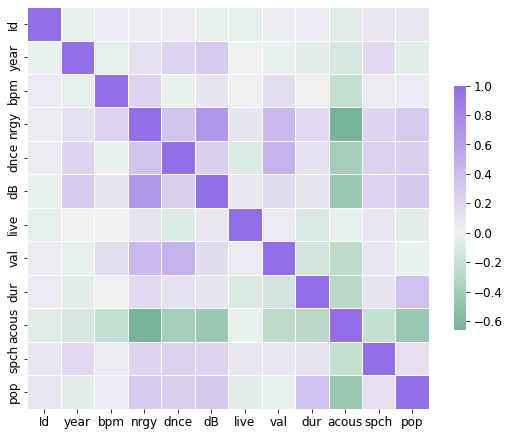

In [114]:
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(150, 275, s = 80, l = 55, n = 9, as_cmap = True)
sns.heatmap(cor_mat,cmap = cmap, center = 0,square = True,
             linewidths =.6,cbar_kws={"shrink": .5} )

# 4. Cleaning Data

We have decided to clean the data by dropping all the attributes with a poor or negative correlation to the popularity of the song. We have also decided to drop all the attributes with missing values such as top genre.

## 4.1 Droping some of the attributes

In [19]:
Song_popularity_train= Song_popularity_train.drop("Id", axis=1)
Song_popularity_train= Song_popularity_train.drop("title", axis=1)
Song_popularity_train= Song_popularity_train.drop("artist", axis=1)
Song_popularity_train= Song_popularity_train.drop("top genre", axis=1)
Song_popularity_train= Song_popularity_train.drop("year", axis=1)
Song_popularity_train= Song_popularity_train.drop("live", axis=1)
Song_popularity_train= Song_popularity_train.drop("acous", axis=1)
Song_popularity_train= Song_popularity_train.drop("val", axis=1)

In [70]:
Song_popularity_test =pd.read_csv('CS98XRegressionTest.csv')
Id=Song_popularity_test.iloc[:,0]

In [71]:
Song_popularity_test= Song_popularity_test.drop("Id", axis=1)
Song_popularity_test= Song_popularity_test.drop("title", axis=1)
Song_popularity_test= Song_popularity_test.drop("artist", axis=1)
Song_popularity_test= Song_popularity_test.drop("top genre", axis=1)
Song_popularity_test= Song_popularity_test.drop("year", axis=1)
Song_popularity_test= Song_popularity_test.drop("live", axis=1)
Song_popularity_test= Song_popularity_test.drop("acous", axis=1)
Song_popularity_test= Song_popularity_test.drop("val", axis=1)

In [24]:
Song_popularity_train

,bpm,nrgy,dnce,dB,dur,spch,pop
0,107,31,45,-8,150,3,44
1,114,44,53,-8,139,3,37
2,105,36,63,-9,245,3,77
3,170,28,47,-16,232,3,67
4,121,47,56,-8,193,3,63
...,...,...,...,...,...,...,...
448,80,22,18,-17,214,4,45
449,148,81,53,-13,147,3,50
450,168,55,73,-8,289,14,77
451,165,87,64,-5,191,8,62


# 5. Creating the test set

In [72]:
import numpy as np
np.random.seed(42)

In [73]:
X=Song_popularity_train.values[:,0:-1]
Y=Song_popularity_train.values[:,-1]

In [74]:
X

array([[107,  31,  45,  -8, 150,   3],
       [114,  44,  53,  -8, 139,   3],
       [105,  36,  63,  -9, 245,   3],
       ...,
       [168,  55,  73,  -8, 289,  14],
       [165,  87,  64,  -5, 191,   8],
       [105,  73,  68,  -8, 281,   2]], dtype=int64)

In [75]:
Y

array([44, 37, 77, 67, 63, 74, 44, 71, 34, 35, 63, 68, 30, 35, 60, 40, 46,
       65, 62, 77, 74, 71, 64, 63, 42, 59, 28, 55, 48, 74, 78, 73, 61, 71,
       78, 30, 66, 40, 70, 63, 57, 74, 60, 67, 60, 61, 60, 76, 71, 78, 53,
       60, 59, 61, 68, 37, 70, 30, 70, 68, 67, 56, 77, 52, 66, 72, 69, 48,
       39, 79, 70, 79, 28, 49, 75, 73, 61, 49, 38, 65, 42, 38, 68, 42, 59,
       67, 70, 30, 54, 73, 29, 60, 70, 43, 80, 53, 56, 72, 40, 67, 55, 69,
       54, 44, 46, 46, 71, 47, 73, 58, 71, 58, 56, 59, 58, 77, 41, 77, 68,
       62, 39, 66, 70, 67, 62, 52, 66, 43, 58, 70, 63, 49, 70, 75, 61, 39,
       55, 65, 72, 67, 56, 41, 73, 51, 41, 48, 53, 76, 71, 58, 66, 44, 59,
       71, 71, 47, 65, 38, 60, 72, 73, 70, 82, 56, 63, 62, 69, 68, 61, 76,
       53, 75, 77, 56, 48, 54, 62, 62, 73, 65, 68, 46, 79, 61, 57, 61, 77,
       60, 63, 63, 72, 48, 32, 56, 73, 36, 77, 78, 65, 73, 73, 62, 60, 60,
       79, 67, 72, 56, 76, 66, 55, 57, 66, 64, 64, 33, 58, 68, 37, 38, 40,
       71, 41, 58, 49, 55

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 6. Visualising the training set

## 6.1 Revisiting Correlations

As above, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. This shows the strength of any potential linear relationship between the values. We look at this again, this time with only the variables that will be used in the regression model.

In [78]:
corr_matrix=Song_popularity_train.corr()

In [79]:
corr_matrix["pop"].sort_values(ascending=False)

pop     1.000000
dur     0.363266
dB      0.316854
nrgy    0.303797
dnce    0.258670
spch    0.130955
bpm     0.055024
Name: pop, dtype: float64

Saving figure scatter_matrix_plot


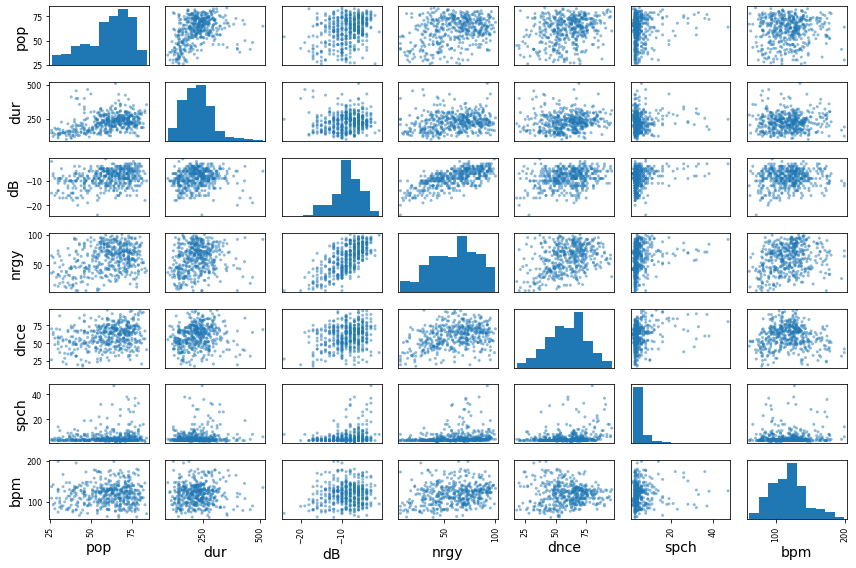

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["pop","dur","dB",
              "nrgy","dnce","spch","bpm"]
scatter_matrix(Song_popularity_train[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# 7. Select and Train the model

## 7.1 Training and Evaluating on the Training Set

### 7.1.1 Linear Regression

When starting a regression problem, a simple Linear Regression model is often used first as it can give a quick and reliable benchmark for comparing with other regression methods. For this reason we have started with this simple regression model. 

In [80]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_train,y_train)

0.22009017650427465

In [81]:
y_pred = lin_reg.predict(X_test)

In [82]:
from sklearn import metrics

In [38]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

13.001370831820983


In [83]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

10.212823330955475
169.03564350652545


### 7.1.2 Decision Tree

The Decision Tree Regressor model will create a model in the shape of a 'tree' which it will then use to predict future values.

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [85]:
y_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test,y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

15.267216907082709

This gives a higher RMSE than the simple Linear Regression model above.

### 7.1.3 Support Vector Machine (SVM)

The Support Vector Machine can also be used in a regression model. It will fit as many instances as it can into a defined set of boundaries. We have used SVM regression here to see if we can improve on the first Linear Regression model. 

In [86]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train,y_train)
y_pred= svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test,y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

13.215505431612307

### 7.1.4 Random Forest Regressor

Using an ensemble method can often achieve a better result than a single regression method as it can combine the results of several methods and improve on them. Here we have used a Random Forest Regressor which is an ensemble of Decision Trees. This method will hopefully result in an improved model.

In [87]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(max_features=3,n_estimators=75,random_state=42)
forest_reg.fit(X_train,y_train)

RandomForestRegressor(max_features=3, n_estimators=75, random_state=42)

In [88]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

12.142940607340817

The RMSE for the ensemble method is lower than that of any other methods that we have used.

# 8. Better Evaluation using Cross Validation

Cross validation will take the dataset and split it randomly into 'folds'. These will be trained on and evaluated. We have chosen to use 10 'folds' so the result is the 10 scores below.

In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [90]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [14.55424635 16.10427974 14.1429042  18.10892966 16.23644734 15.37024543
 17.74197784 14.47833631 14.55335013 14.20015649]
Mean: 15.549087349275561
Standard deviation: 1.3819885189227956


In [91]:
lin_scores = cross_val_score(lin_reg, X, Y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [13.08367835 11.41219725 10.02531612 10.2786866  11.58883901 13.39711841
 12.79600897 12.34130884 13.54435558 10.68130052]
Mean: 11.91488096411488
Standard deviation: 1.2371270057479518


In [92]:
scores = cross_val_score(lin_reg, X, Y, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean     11.914881
std       1.304046
min      10.025316
25%      10.864025
50%      11.965074
75%      13.011761
max      13.544356
dtype: float64

In [93]:
SVM_scores = cross_val_score(svm_reg, X, Y,
                             scoring="neg_mean_squared_error", cv=10)
SVM_rmse_scores = np.sqrt(-SVM_scores)
display_scores(SVM_rmse_scores)

Scores: [13.1385656  11.52595771 10.17789452 10.57126448 12.07257511 13.34122625
 12.83552757 12.50091879 14.33705514 10.75207831]
Mean: 12.125306349408342
Standard deviation: 1.2844337557700034


In [49]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X, Y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [11.81242431 10.73832614  9.8962832  11.02207993 12.07043412 12.16526056
 11.2796023  11.55058731 12.06787684 10.66082748]
Mean: 11.326370218377182
Standard deviation: 0.7086884860785613


The Random Forest scores using cross-validation show a lower standard deviation and a lower mean. They also show a lower score than the training set above which could indicate overfitting.

# 9 Fine-Tuning the Model

After running and assessing several models, we need to fine-tune them. There are many methods that can be used in order to improve results. Firstly, we start by using Randomized Search, then we try a Gradient Boosting ensemble for better performance over the individual models.

## 9.1 Randomized Search

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg1= RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg1, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023C98235B20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023C98235F70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [51]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 7, 'n_estimators': 180}
11.618590373783542 {'max_features': 5, 'n_estimators': 15}
11.400506537025043 {'max_features': 3, 'n_estimators': 72}
11.529706692948825 {'max_features': 5, 'n_estimators': 21}
nan {'max_features': 7, 'n_estimators': 122}
11.398740869992853 {'max_features': 3, 'n_estimators': 75}
11.376668811936602 {'max_features': 3, 'n_estimators': 88}
11.568257194482863 {'max_features': 5, 'n_estimators': 100}
11.331438601606745 {'max_features': 3, 'n_estimators': 150}
13.459494925999403 {'max_features': 5, 'n_estimators': 2}


In [95]:
forest_reg1 = RandomForestRegressor(max_features=3,n_estimators=75,random_state=42)
forest_reg1.fit(X_train, y_train)

RandomForestRegressor(max_features=3, n_estimators=75, random_state=42)

## 9.2 Feature Importance

The Random Forest Regressor will allow us to find out what the best attributes are for making predications. The scores of the most important attributes are found and listed below.

In [96]:
feature_importances = rnd_search.best_estimator_.feature_importances_

In [97]:
feature_importances

array([0.11307558, 0.17532931, 0.13263738, 0.12175433, 0.39429164,
       0.06291177])

In [99]:
num_attributes=list(Song_popularity_train)

In [100]:
attributes=num_attributes

In [101]:
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3942916403198778, 'dur'),
 (0.17532931213024072, 'nrgy'),
 (0.13263737600037048, 'dnce'),
 (0.12175432585081268, 'dB'),
 (0.11307557654866464, 'bpm'),
 (0.06291176915003364, 'spch')]

# 9.3 Using ensemble Gradient Boosting

Gradient Boosting was chosen as it can improve the performance of a model by adding to the previous predictor in the ensemble.


In [102]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [103]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

# 10 Evaluate the System on the Test Set

In [104]:
final_model = rnd_search.best_estimator_

In [105]:
y_pred = final_model.predict(X_test)

In [106]:
final_mse = mean_squared_error(y_test,y_pred)
final_rmse = np.sqrt(final_mse)

In [107]:
final_rmse

4.368006449386304

## Computing 95% confidence interval for the test RMSE

In [108]:
from scipy import stats

confidence = 0.95
squared_errors = (y_pred- y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([3.51356219, 5.08073237])

## Saving prediction Results to CSV

In [110]:
Result = pd.DataFrame()
Result['Id']= Id
Result['pop'] = pd.DataFrame(final_model.predict(Song_popularity_test))
Result.to_csv('Result.csv', index= False)

## Conclusion

The RMSE score of the models was used in the evaluation. Generally, a lower RMSE is preferable as it indicates a better performing model. The first Linear Regression method that we used achieved a RMSE of 13 which we then used as a benchmark to compare the other models. Both the Decision Tree and the SVM performed worse however, but with a RMSE score of 12, the Random Forest Regressor was shown to be the better model. The final model achieved a RMSE of 4.37 (2 d.p) which was a significant improvement on the previous methods, this implemented Randomised Search. The final version of the regression model which was submitted to Kaggle initially gave a result of 7.49012. This changed to 10.18852 once the competition ended. 

We ran into a few problems, most notably with scaling of the data. When this was implemented, it resulted in a much higher RMSE so we agreed that future work would likely start at investigating why this was the case. The comparison of other methods for boosting and fine-tuning would be useful to ascertain whether these methods would improve the model.


#### References

[1]A. Géron and R. Demarest, Hands-on machine learning with Scikit-Learn and TensorFlow. Sebastopol (Clif.) [etc.]: O'Reilly, 2019.

[2]"1.4. Support Vector Machines", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/svm.html#regression. [Accessed: 08- Feb- 2022].

[3]"1.10. Decision Trees", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/tree.html#regression. [Accessed: 11- Feb- 2022].

[4]"1.11. Ensemble methods", scikit-learn, 2022. [Online]. Available: https://scikit-learn.org/stable/modules/ensemble.html. [Accessed: 09- Feb- 2022].